<a href="https://colab.research.google.com/github/Al1veeee/Jupiter-Notebook/blob/main/Alimkhanov_D_Workbook4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> РАБОЧАЯ ТЕТРАДЬ 4</h1>
<h2> Алимханов Дени ИКБО-68-23</h2>
<h1>1.1. Теоретический материал – Линейные регрессионные модели </h1>
Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).

<h1>1.1.1 Пример</h1>
Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]


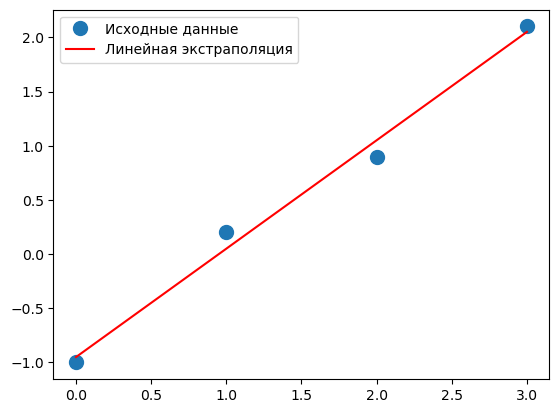

In [ ]:
#1.1.1 прямая через эксперементальные точки
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
print(A)
m, c = np.linalg.lstsq(A, y, rcond = None)[0]

plt.plot(x, y, 'o', label = "Исходные данные", markersize = 10)
plt.plot(x, m*x + c, 'r', label = "Линейная экстраполяция")
plt.legend()
plt.show()

<h1> 1.1.2 Пример</h1>

Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.


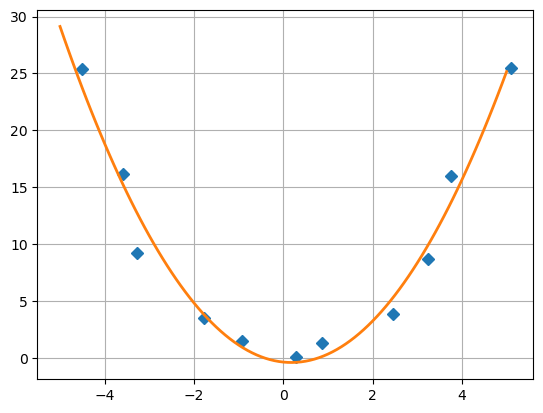

In [ ]:
#1.1.2 полином второго порядка
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt

#Генерируем случайные x,y
delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

# Запись данных в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# Читаем данные из файлов
x = fromfile('x_data.txt', float, sep = '\n')
y = fromfile('y_data.txt', float, sep = '\n')

# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# Задаем вектор m = [x**2, x, E]
m = vstack((x ** 2, x, ones(11))).T
# Находим коэффеициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# На отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)

# Рисуем точки
plt.plot(x, y, 'D')

# Рисуем кривую вида y = ax^2 + bx + c, подставляя в решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()

<h1>1.1.3 Пример</h1>
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

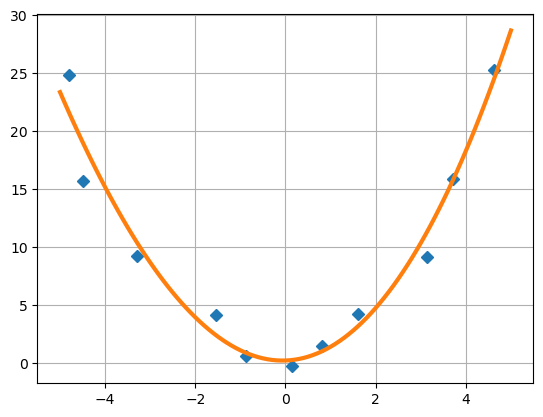

In [ ]:
#1.1.3 полином третьего порядка
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt

delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# Задаем вектор m = [x**2, x, E]
m = vstack((x ** 3, x ** 2, x, ones(11))).T
# Находим коэффеициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# На отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)

# Рисуем точки
plt.plot(x, y, 'D')

# Рисуем кривую вида y = ax^2 + bx + c, подставляя в решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

<h1>Задание</h1>
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

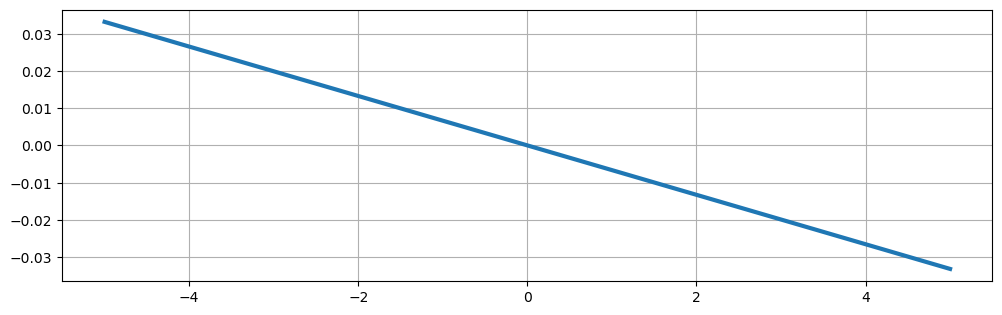

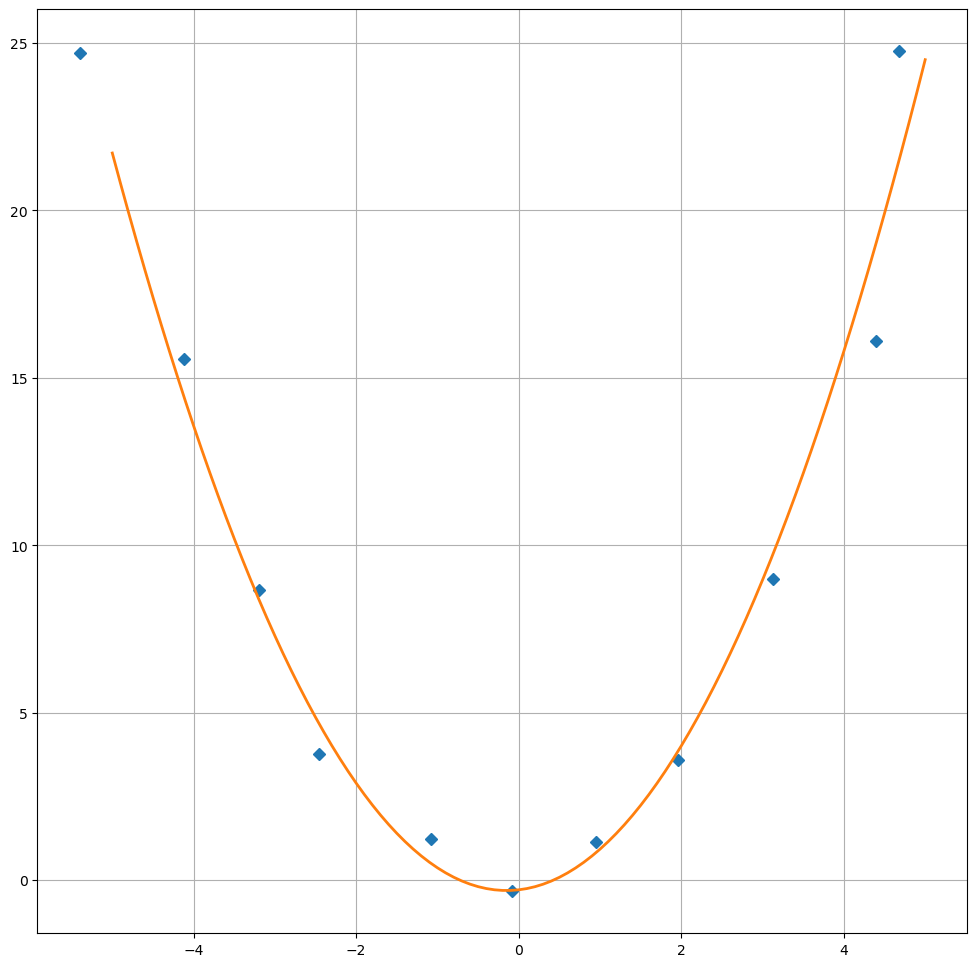

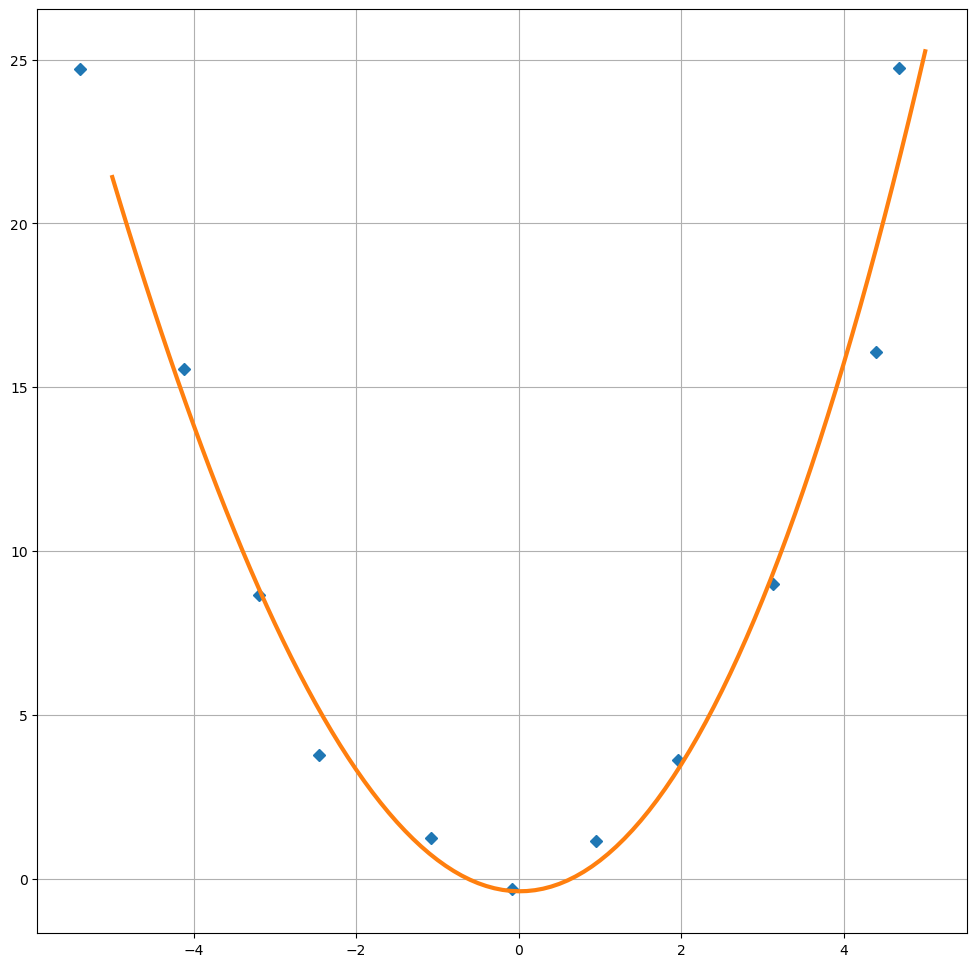

In [ ]:
#1.1.3 полином первого, второго и третьего порядка
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt

delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)
# полином первого порядка (прямая)
m1 = vstack((x, ones(11))).T
s1 = np.linalg.lstsq(m1, y, rcond = None)[0]
plt.figure(figsize = (12, 12))
plt.subplot(3, 1, 1)
plt.plot(x_prec, s1[0] * x_prec, '-', lw = 3)
plt.grid()
# полином второго порядка (парабола)
m2 = vstack((x ** 2, x, ones(11))).T
s2 = np.linalg.lstsq(m2, y, rcond = None)[0]
x_prec = linspace(-5, 5, 101)
plt.figure(figsize = (12, 12))
plt.plot(x, y, 'D')
plt.plot(x_prec, s2[0] * x_prec ** 2 + s2[1] * x_prec + s2[2], '-', lw = 2)
plt.grid()
plt.savefig('парабола.png')
# полином третьего порядка
m3 = vstack((x ** 3, x ** 2, x, ones(11))).T
s3 = np.linalg.lstsq(m3, y, rcond = None)[0]
x_prec = linspace(-5, 5, 101)
plt.figure(figsize = (12, 12))
plt.plot(x, y, 'D')
plt.plot(x_prec, s3[0] * x_prec ** 3 + s3[1] * x_prec ** 2 + s3[2] * x_prec + s3[3], '-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

<h1>1.1.4 Пример</h1>
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥2)

0.00020322071260688235
0.10551972841481265


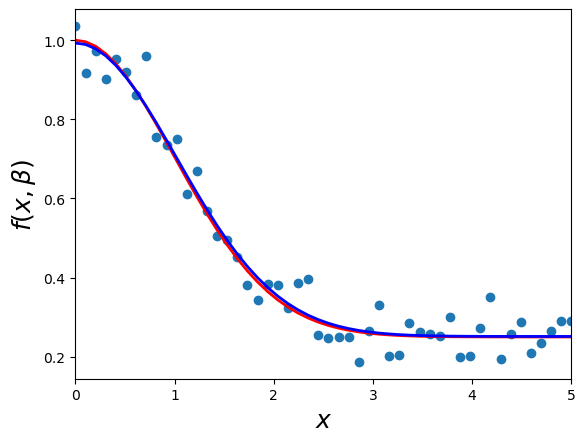

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.03604754 0.91735403 0.9726342  0.90306124 0.9524846  0.91855088
 0.86150678 0.95914809 0.75595947 0.73608016 0.74947375 0.61171062
 0.66870584 0.5694569  0.50481838 0.4940292  0.45310149 0.38039579
 0.34249255 0.3835212  0.38120556 0.32347923 0.38585424 0.39757472
 0.25605084 0.24787378 0.24945235 0.24973715 0.18686535 0.26569478
 0.33071784 0.20306109 0.20420757 0.28398805 0.2627513  0.2581188
 0.25287954 0.30037996 0.19868587 0.202

In [ ]:
#1.1.4
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#Добавим шума в данные, сделанные по функции f(x,b)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)
#задаем массив точек xi
xdata = np.linspace(0, 5, 50)
#создаем теоретически правильные значения точек yi без шума
y = f(xdata, *beta)
#Добавим шума в данные
ydata = y + 0.05 * np.random.randn(len(xdata))
#Испрользуем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata, ydata
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt
#Вычисляем линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Квадратное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f (x, \beta)$", fontsize = 18)
plt.show()
print(xdata)
print(ydata)

<h1>1.1.5 Пример</h1>
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 </br>
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥^2 </br>
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥) </br>
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥^𝑏1 </br>

[0.24037099 0.75447182]
0.00013267474982946788
0.11666227780444915


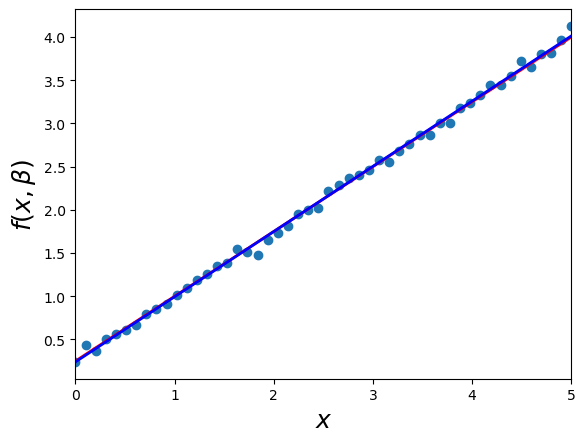

In [ ]:
#1.1.5
# Решение 1
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
xdata = linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

[0.2298579  0.77043809 0.49596879]
0.0001633110901017275
0.13618436080827614


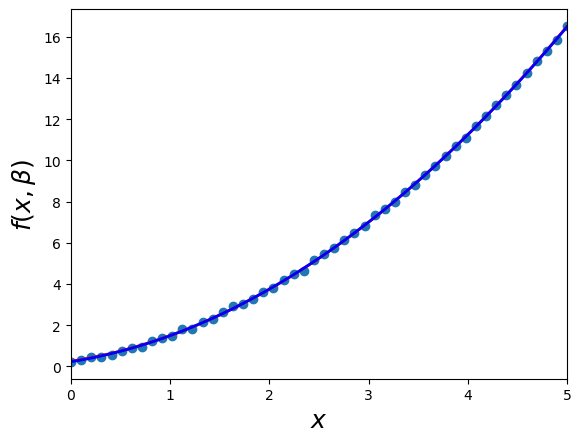

In [ ]:
#1.1.5
# Решение 2
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
xdata = linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

[1.00108873 2.00932468]
5.634220347945754e-05
0.13028804271081773


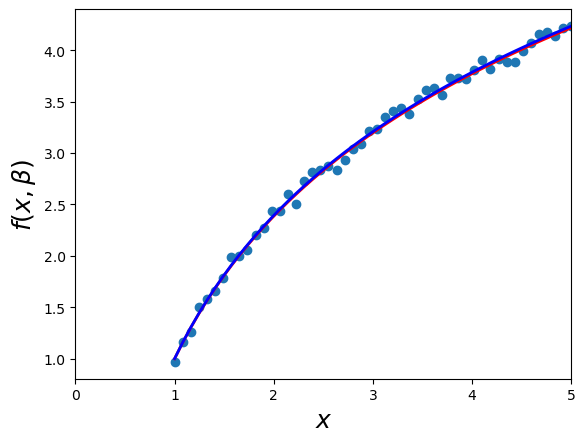

In [ ]:
#1.1.5
# Решение 3
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * log(x)
xdata = linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

[0.99530939 2.00026125]
9.586947273157539e-05
0.10692676888776625


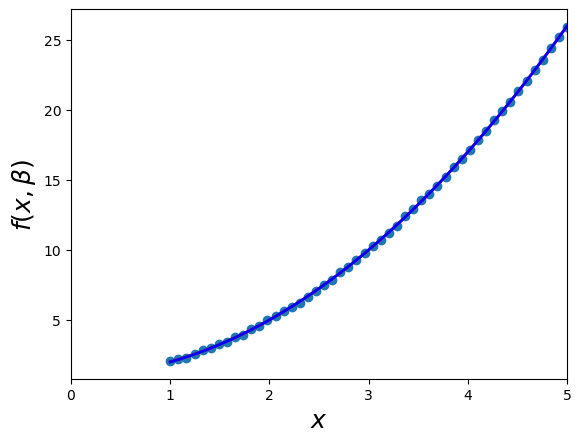

In [ ]:
#1.1.5
# Решение 4
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
beta = (1, 2)
def f(x, b0, b1):
    return b0 + x ** b1
xdata = linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

<h1>Задание</h1>
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

[0.05046943 0.95067222]
0.00014901250482087354
0.10817987351097726


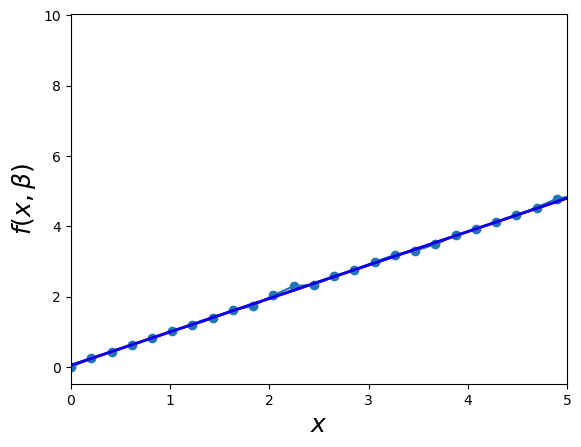

In [ ]:
# Решение 1
# Добавим шума в данные, сделанные по функции f(x,b) с коэффицентами b=(0.25,0.75)
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

beta=(0.05, 0.95)
def f(x,b0,b1):
    return b0 + b1 * x
# Зададим массив точек xi
xdata=np.linspace(0,10,50)

# создаем теоритически правильные значения точек yi (без шума)

y=f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)
# вычисли линенйные отклонения
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.17116701 0.8345798  0.40260439]
0.00012116810081357735
0.10104151247926267


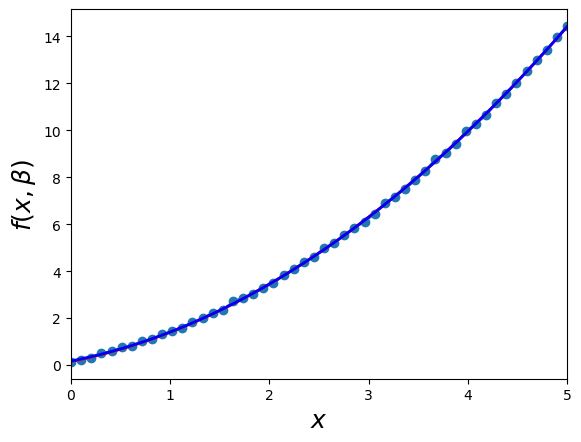

In [ ]:
# Решение 2
# Добавим шума в данные, сделанные по функции f(x,b) с коэффицентами b=(0.25, 0.75,0.5)
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

beta=(0.15, 0.85,0.4)
def f(x,b0,b1,b2):
    return b0 + b1 * x+b2*x*x
# Зададим массив точек xi
xdata=np.linspace(0,5,50)

# создаем теоритически правильные значения точек yi (без шума)

y=f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)
# вычисли линенйные отклонения
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[2.02995364 9.98080286]
5.834197385361982e-05
0.10905284223328532


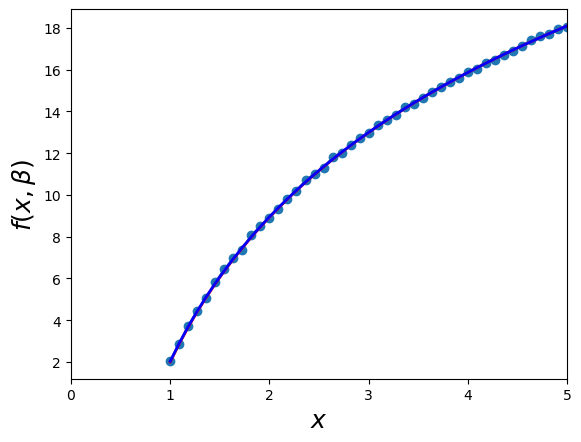

In [ ]:
# Решение 3
# Добавим шума в данные, сделанные по функции f(x,b) с коэффицентами b=(1,2)
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

beta=(2,10)
def f(x,b0,b1):
    return b0 + b1 * np.log(x)
# Зададим массив точек xi
xdata=np.linspace(1,5,45)

# создаем теоритически правильные значения точек yi (без шума)

y=f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)
# вычисли линенйные отклонения
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.00092867 3.99995649]
0.00011778889881318458
0.12310693828011002


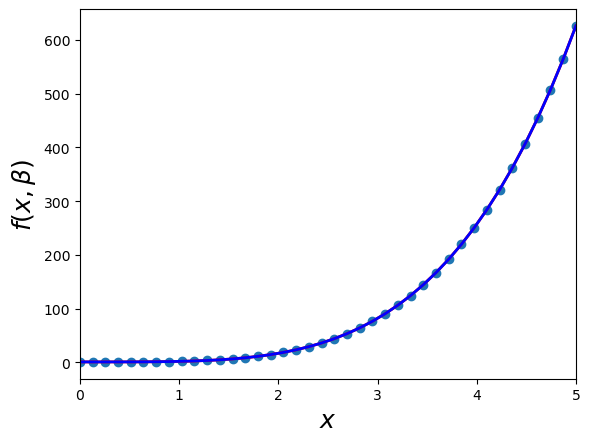

In [ ]:
# Решение 4
# Добавим шума в данные, сделанные по функции f(x,b) с коэффицентами b=(1,2)
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

beta=(1,4)
def f(x,b0,b1):
    return b0 + x ** b1
# Зададим массив точек xi
xdata=np.linspace(0,5,40)

# создаем теоритически правильные значения точек yi (без шума)

y=f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)
# вычисли линенйные отклонения
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

<h1>1.2. Теоретический материал – Задачи регрессии</h1>
Линейная регрессия - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной
регрессией. </br>
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.


<h1>1.2.1 Пример</h1>
Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


(20, 2)
       Учебное время     Оценка
count      20.000000  20.000000
mean        2.787500  53.700000
std         1.507165  26.435821
min         0.500000  10.000000
25%         1.687500  30.250000
50%         2.625000  58.500000
75%         4.062500  75.250000
max         5.500000  93.000000


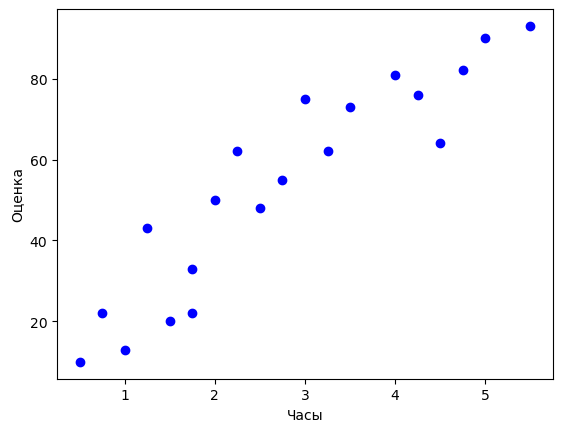

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]
   Actual  Predicted
0      90  90.610737
1      22  18.245701
2      93  99.124271
3      62  43.786302


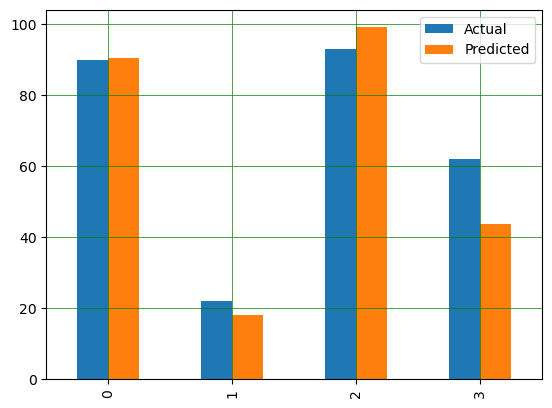

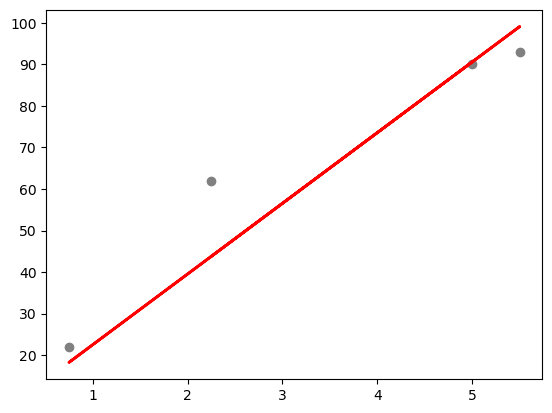

In [ ]:
#1.2.1 линейная регрессия
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {"Учебное время" : [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75 ,2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00,
                             4.25, 4.50, 4.75, 5.00, 5.50],
          'Оценка' : [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
print(dataset.head())

print(dataset.shape)
print(dataset.describe())
#Точечная диаграмма
plt.scatter (dataset['Учебное время'], dataset['Оценка'], color = 'b', label = 'данные экзамена')
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)
#Разделение на обущающий и тестовый ноборы
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#Линии реграссии
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(x_test)
#Сравнение фактических значений с прогнозируемыми
df = pd.DataFrame({"Actual": y_test, "Predicted" : y_pred})
print(df)
#Гистограмма
df.plot(kind = "bar")
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()
#Линия регрессси с тестовыми данными
plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, y_pred, color = 'red', linewidth = 2)
plt.show()

<h1>Задание</h1>

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
Коэффициенты линии регрессии
26780.09915062818
[9312.57512673]


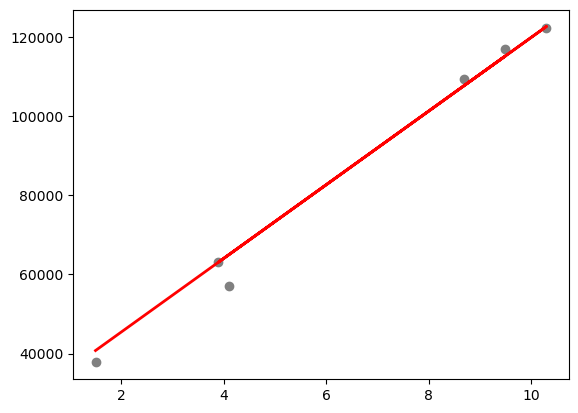

In [ ]:
#Постройте модель линейной регрессии для произвольных данных из двух столбцов.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("Коэффициенты линии регрессии")
print(regressor.intercept_)
print(regressor.coef_)

#plt.scatter(x, y, color = 'aqua')
plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, y_pred, color = 'red', linewidth = 2)
plt.show()

<h1>1.3 Теоретический материал – Множественная регрессия</h1>
В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.

<h1>1.3.1 Пример</h1>

Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

In [ ]:
#1.3.1 множественная регрессия
import numpy as np

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]
x = np.transpose(x)
x = np.c_[x, np.ones(x.shape[0])]
linreg = np.linalg.lstsq(x, y, rcond = None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


<h1>1.3.2 Пример</h1>

Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

In [ ]:
#1.3.2 модель множественной линейной регрессии
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]
#Формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2 : 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis = 1, join = "inner")
print(dataset.head())
print(dataset.shape)
dataset.describe()
#Разделим данные на метки и атрибуты
x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']
#Разделим данные на обучающиую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns = ['Coefficient'])
print(coeff_df)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(df)
#Оценка произволительности алгоритма
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))

   y  x1  x2  x3
0  1   0   4   4
1  2   2   1   1
2  3   4   2   2
3  4   1   3   5
4  3   5   4   6
(23, 4)
    Coefficient
x1     0.223219
x2     0.136709
x3    -0.063757
    Actual  Predicted
11       5   4.119478
10       4   3.153648
21       3   3.199155
14       4   4.078333
20       1   3.258079
Mean Squared Error:  1.327269924234307


## Задание

Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv

2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url="https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
dataF = pd.read_csv(url)
y= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48]


new_y = np.array(y)
new_y = new_y.transpose()
df3 = pd.DataFrame(new_y)
df3 = df3.rename(columns = {0:'Num_contry'}, inplace = False)

new_X = np.array(dataF)

df4 = pd.DataFrame(new_X)
df4 = df4.rename(columns = {0: 'Petrol_tax', 1: 'Average_income',2: 'Paved_Highways',3: 'Population_Driver_licence(%)',4: 'Petrol_Consumption'}, inplace = False)

frames = [df3, df4]
dataset = pd.concat([df3,df4], axis=1, join="inner")
dataset.head()

,Num_contry,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,1,9.0,3571.0,1976.0,0.525,541.0
1,2,9.0,4092.0,1250.0,0.572,524.0
2,3,9.0,3865.0,1586.0,0.580,561.0
3,4,7.5,4870.0,2351.0,0.529,414.0
4,5,8.0,4399.0,431.0,0.544,410.0


In [ ]:
print(dataset.shape)
dataset.describe()

(48, 6)


,Num_contry,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000
mean,24.50,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,14.00,0.950770,573.623768,3491.507166,0.055470,111.885816
min,1.00,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,12.75,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,24.50,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,36.25,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,48.00,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
X = dataset.iloc[:, 1:]
y = dataset['Num_contry']
X.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571.0,1976.0,0.525,541.0
1,9.0,4092.0,1250.0,0.572,524.0
2,9.0,3865.0,1586.0,0.580,561.0
3,7.5,4870.0,2351.0,0.529,414.0
4,8.0,4399.0,431.0,0.544,410.0


In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0 )

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-5.373616
Average_income,-0.002879
Paved_Highways,-0.000701
Population_Driver_licence(%),13.870414
Petrol_Consumption,0.025072


In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,30,17.249996
4,5,20.884256
26,27,24.379635
30,31,27.577585
32,33,25.114959
37,38,31.480195
34,35,22.382357
40,41,28.737261
7,8,19.147884
10,11,21.111666


<h1>Задача</h1>
Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

In [ ]:
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])
x, y

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), array([3., 6., 3., 6., 4., 3.]))

In [ ]:
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0. , 1. ],
       [0.2, 1. ],
       [0.4, 1. ],
       [0.6, 1. ],
       [0.8, 1. ],
       [1. , 1. ]])

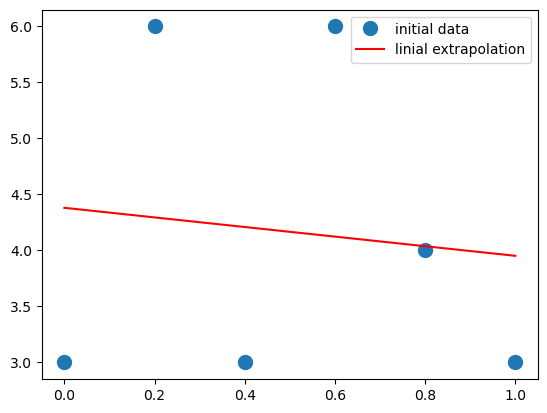

In [ ]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y, 'o', label='initial data', markersize=10)
plt.plot(x, m*x + c, 'r', label='linial extrapolation')
plt.legend()
plt.show()

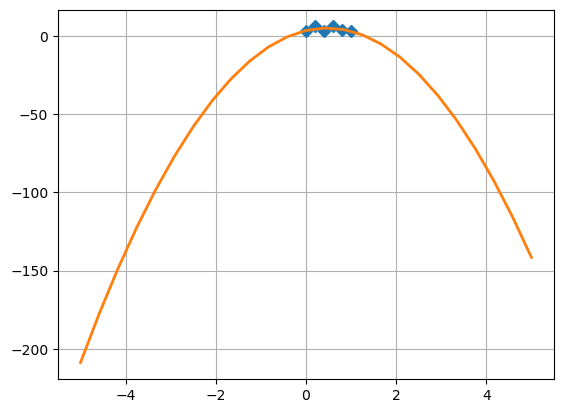

In [ ]:
m = np.vstack((x**2, x, np.ones(6))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-5, 5, 25)

plt.plot(x, y, 'D')

plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2],'-', lw=2)

plt.grid()
plt.show()